In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv('/home/chiru/Downloads/bank-additional-full.csv',sep=';')

In [9]:
data.describe(include='all',percentiles=[0.25,0.75,0.90,0.95,0.99])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


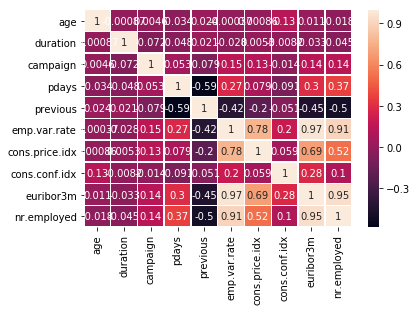

In [7]:
sns.heatmap(data.corr(),linewidths=.5,annot=True)
plt.figure(figsize=(50,50))
plt.show()

In [25]:
df=data[['marital','y']]
group=df.groupby(['marital','y'])
#group['rate']=group['yes']/group['yes']+group['no']
df1=group['y'].count().unstack()
df1['rate']=(df1['yes']/(df1['yes']+df1['no']))*100
df1

y,no,yes,rate
marital,,,
divorced,4136,476,10.320902
married,22396,2532,10.157253
single,9948,1620,14.004149
unknown,68,12,15.000000


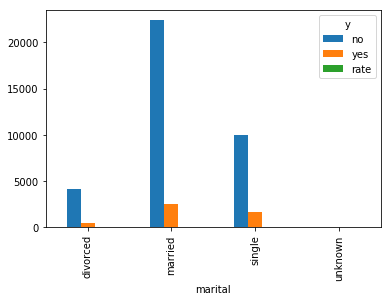

In [38]:
df1.plot(kind='bar')
plt.show()

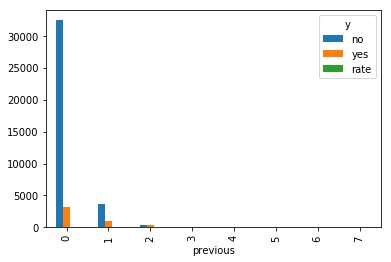

In [71]:
df=data[['previous','y']]
group=df.groupby(['previous','y'])
#group['rate']=group['yes']/group['yes']+group['no']
df2=group['y'].count().unstack()
df2['rate']=(df2['yes']/(df2['yes']+df2['no']))*100

df2.plot(kind='bar')
plt.show()

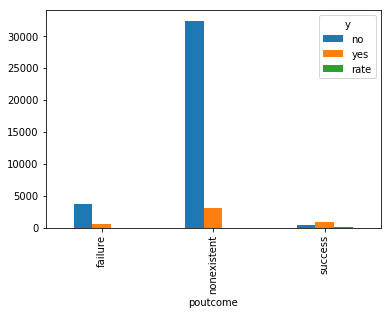

(y               no   yes       rate
 poutcome                           
 failure       3647   605  14.228598
 nonexistent  32422  3141   8.832213
 success        479   894  65.112891, None)

In [37]:
df=data[['poutcome','y']]
group=df.groupby(['poutcome','y'])
#group['rate']=group['yes']/group['yes']+group['no']
df3=group['y'].count().unstack()
df3['rate']=(df3['yes']/(df3['yes']+df3['no']))*100

df3.plot(kind='bar')
df3,plt.show()

In [69]:
pd.set_option('display.max_rows', None)
df=data[['age','job','duration','y']]
group=df.groupby(['job','age','y'])
#group['rate']=group['yes']/group['yes']+group['no']
df4=group['y'].count().unstack()
df4['rate']=(df4['yes']/(df4['yes']+df4['no']))*100

df4.plot(kind='bar')
df4[(df4['rate']<=20)]

y                     no   yes       rate
job           age                        
admin.        21    11.0   1.0   8.333333
              23    41.0   8.0  16.326531
              25   131.0  27.0  17.088608
              27   219.0  51.0  18.888889
              28   223.0  52.0  18.909091
              29   468.0  88.0  15.827338
              30   450.0  74.0  14.122137
              31   514.0  68.0  11.683849
              32   510.0  63.0  10.994764
              33   520.0  75.0  12.605042
              34   453.0  68.0  13.051823
              35   436.0  61.0  12.273642
              36   462.0  49.0   9.589041
              37   325.0  54.0  14.248021
              38   312.0  36.0  10.344828
              39   338.0  26.0   7.142857
              40   265.0  23.0   7.986111
              41   237.0  39.0  14.130435
              42   267.0  22.0   7.612457
              43   221.0  28.0  11.244980
              44   210.0  22.0   9.482759
              45   213.0  26.0  10.878661
              46   246.0  31.0  11.191336
              47   187.0  23.0  10.952381
              48   205.0  31.0  13.135593
              49   163.0  16.0   8.938547
              50   160.0  26.0  13.978495
              51   147.0  18.0  10.909091
              52   140.0  27.0  16.167665
              53   125.0  15.0  10.714286
              54   102.0  21.0  17.073171
              55   129.0  13.0   9.154930
              56   100.0  12.0  10.714286
              57   100.0  17.0  14.529915
              58    85.0  13.0  13.265306
blue-collar   21    14.0   1.0   6.666667
              22    29.0   2.0   6.451613
              23    50.0   8.0  13.793103
              24    74.0   8.0   9.756098
              25   123.0  11.0   8.208955
              26   138.0  12.0   8.000000
              27   181.0  16.0   8.121827
              28   226.0  19.0   7.755102
              29   228.0  17.0   6.938776
              30   300.0  27.0   8.256881
              31   376.0  35.0   8.515815
              32   339.0  26.0   7.123288
              33   326.0  43.0  11.653117
              34   351.0  25.0   6.648936
              35   390.0  26.0   6.250000
              36   429.0  23.0   5.088496
              37   322.0  14.0   4.166667
              38   342.0  25.0   6.811989
              39   340.0  18.0   5.027933
              40   284.0  19.0   6.270627
              41   342.0  16.0   4.469274
              42   272.0  15.0   5.226481
              43   263.0  23.0   8.041958
              44   278.0  18.0   6.081081
              45   296.0  21.0   6.624606
              46   257.0  14.0   5.166052
              47   231.0  10.0   4.149378
              48   251.0  15.0   5.639098
              49   217.0  12.0   5.240175
              50   206.0  19.0   8.444444
              51   189.0  16.0   7.804878
              52   147.0  16.0   9.815951
              53   145.0  15.0   9.375000
              54   139.0   9.0   6.081081
              55   114.0   6.0   5.000000
              56   118.0  11.0   8.527132
              57   123.0   7.0   5.384615
              58    75.0   5.0   6.250000
              59    49.0   7.0  12.500000
              60    20.0   3.0  13.043478
              62     6.0   1.0  14.285714
entrepreneur  24     4.0   1.0  20.000000
              26    13.0   1.0   7.142857
              27    10.0   2.0  16.666667
              28    16.0   3.0  15.789474
              30    28.0   7.0  20.000000
              31    50.0   6.0  10.714286
              32    52.0   2.0   3.703704
              33    43.0   4.0   8.510638
              34    46.0   4.0   8.000000
              35    51.0   6.0  10.526316
              36    57.0   7.0  10.937500
              37    68.0   5.0   6.849315
              38    61.0   5.0   7.575758
              39    52.0   4.0   7.142857
              40    46.0   2.0   4.166667
              41    49.0   9.0  15.517241
              42    47.0   2.0   4.081633
          

In [39]:
d_f1=X_train.select_dtypes(include=['int','float'])
d_f2=X_train.select_dtypes(include=['object'])

In [40]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,OneHotEncoder
lablel_encoder = LabelEncoder()
for i in range(0,len(d_f2.columns)):
    data[d_f2.columns[i]]=lablel_encoder.fit_transform(data[d_f2.columns[i]]) 

In [85]:
X=data.iloc[:,:-1]
y=data.y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [86]:
X_train.shape,X_test.shape

((32950, 20), (8238, 20))

In [87]:
y_train.value_counts()

no     29250
yes     3700
Name: y, dtype: int64

In [88]:
y_test.value_counts()

no     7298
yes     940
Name: y, dtype: int64

In [90]:
model = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=6,min_samples_leaf=2)
fit=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc

0.91235736829327507

In [92]:
from sklearn import tree
import pydotplus
from IPython.display import Image

X_cols = X_train.columns
y_cols = 'y'
dot_data = tree.export_graphviz(fit, out_file=None,
                               feature_names=X_cols,
                               class_names=['yes','no'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1,penalty='l2')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print 'Accuracy using estimator as logistic regression: ',acc

Accuracy using estimator as logistic regression:  0.90786598689


In [53]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# Your solution code here
def rf_rfe(df):
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    model=RandomForestClassifier()
    rfe=RFE(model)
    rfe.fit(X,y)
    features=X.columns[rfe.ranking_ == 1]
    return features.tolist()

rf_rfe(X_train)

ValueError: Unknown label type: 'continuous'